In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import acquire
import prepare

## Store Item Stuff

In [2]:
df = acquire.acquire_merge_dfs()

Using cached csv
Using cached csv
Using cached csv


In [3]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [6]:
df = prepare.prep_stores(df)

In [7]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,01-Jan,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,01-Jan,Tuesday,294.00


In [8]:
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='GMT'),
 Timestamp('2017-12-31 00:00:00+0000', tz='GMT'))

In [9]:
train = df[:'2016']
test = df['2017']

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_62807/3233208282.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


<AxesSubplot:xlabel='sale_date'>

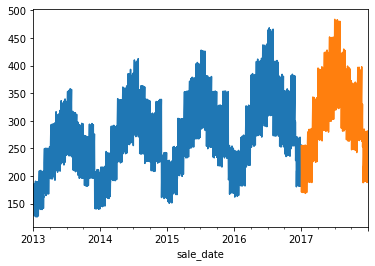

In [10]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

In [11]:
y = train.resample('D').sales_total.mean()

In [12]:
y.head()

sale_date
2013-01-01 00:00:00+00:00    147.68802
2013-01-02 00:00:00+00:00    147.14116
2013-01-03 00:00:00+00:00    156.33896
2013-01-04 00:00:00+00:00    168.93546
2013-01-05 00:00:00+00:00    175.24370
Freq: D, Name: sales_total, dtype: float64

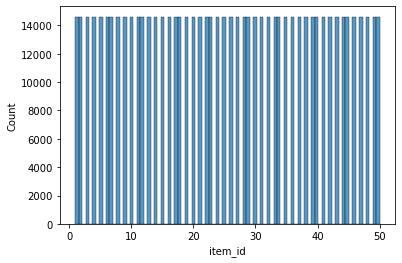

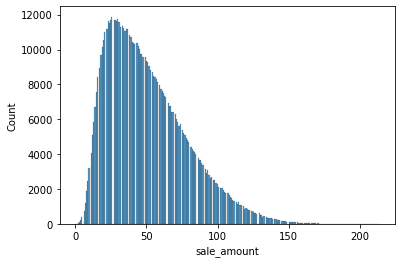

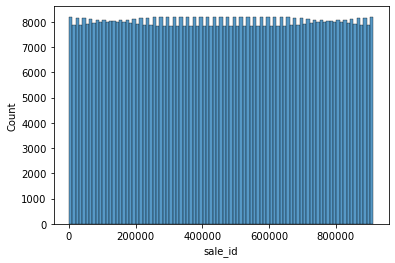

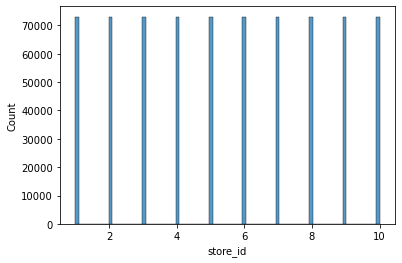

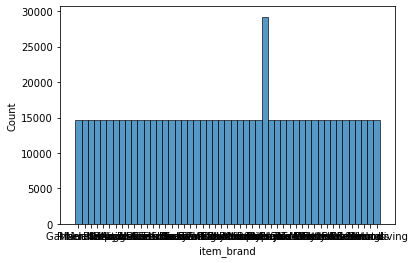

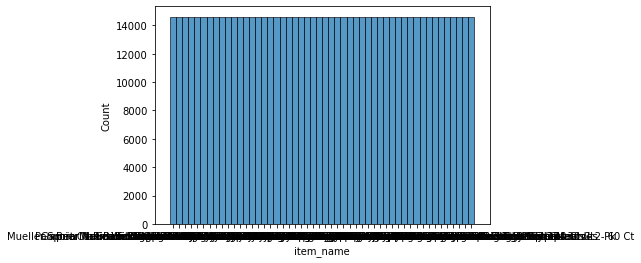

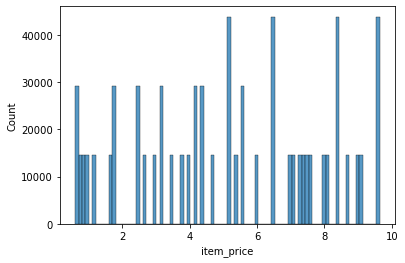

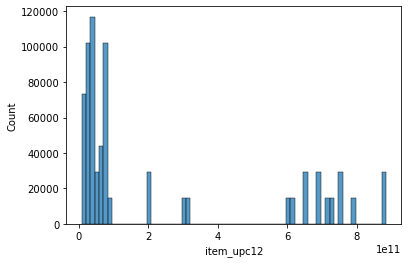

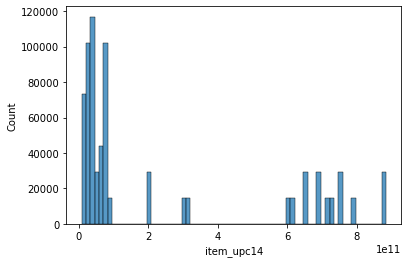

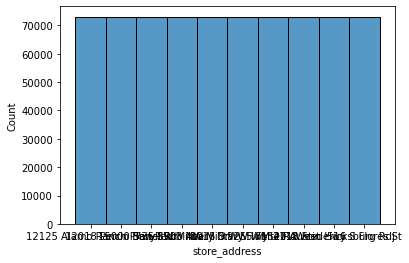

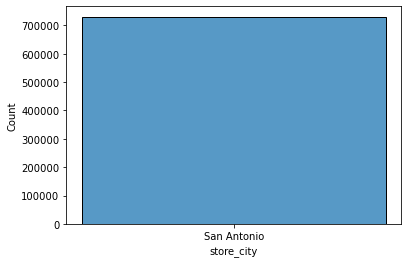

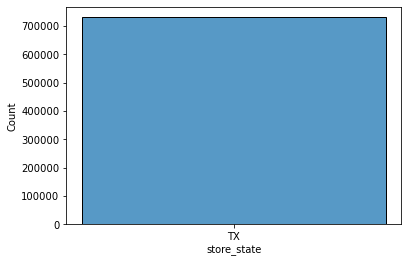

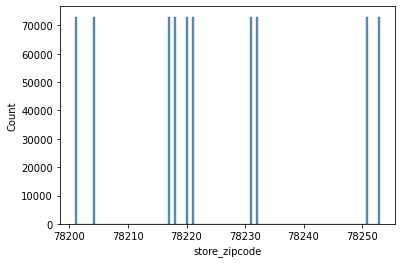

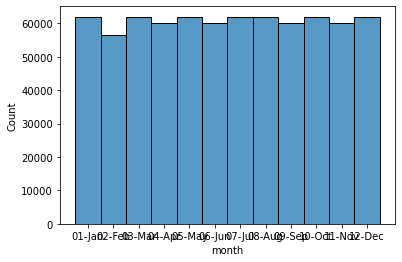

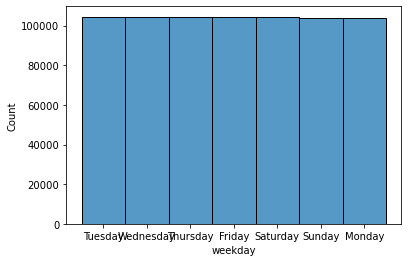

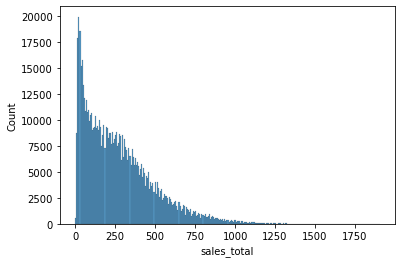

In [14]:
for col in train.columns:
    sns.histplot(train[col])
    plt.show()

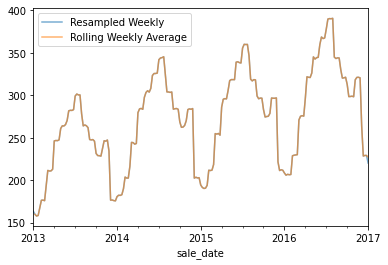

In [16]:
# Plotting weekly average & 7-day moving average.
y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6)
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6)
plt.legend()

Text(0, 0.5, 'Difference in sales from one day to the next')

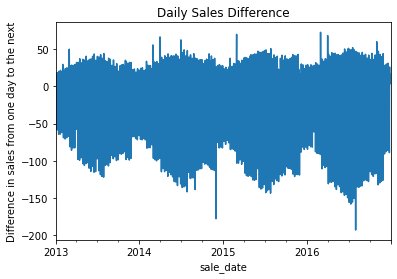

In [17]:
# Plot the daily difference. 
# Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

y.diff().plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, '% Change')

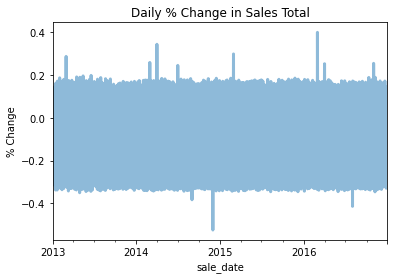

In [18]:
# Maybe it would be helpful to look at percent change as well:

(y.diff() / y.shift()).plot(alpha=.5, lw=3)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

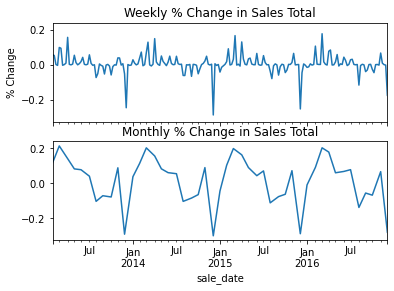

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())

In [20]:
y.resample('W').mean()

sale_date
2013-01-06 00:00:00+00:00    163.589167
2013-01-13 00:00:00+00:00    159.981203
2013-01-20 00:00:00+00:00    157.946720
2013-01-27 00:00:00+00:00    158.545383
2013-02-03 00:00:00+00:00    167.585014
                                ...    
2016-12-04 00:00:00+00:00    263.768997
2016-12-11 00:00:00+00:00    228.559894
2016-12-18 00:00:00+00:00    229.298643
2016-12-25 00:00:00+00:00    229.231000
2017-01-01 00:00:00+00:00    220.279177
Freq: W-SUN, Name: sales_total, Length: 209, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

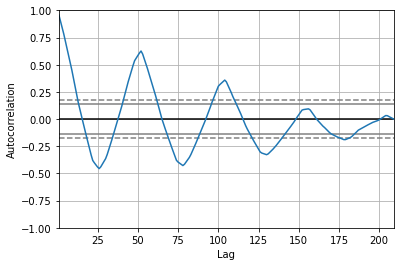

In [21]:
# Autocorrelation after weekly resampling:

pd.plotting.autocorrelation_plot(y.resample('W').mean())

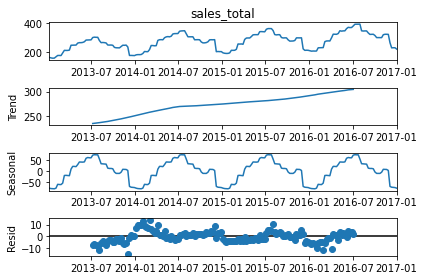

In [22]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
None

In [24]:
y.head()

sale_date
2013-01-01 00:00:00+00:00    147.68802
2013-01-02 00:00:00+00:00    147.14116
2013-01-03 00:00:00+00:00    156.33896
2013-01-04 00:00:00+00:00    168.93546
2013-01-05 00:00:00+00:00    175.24370
Freq: D, Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

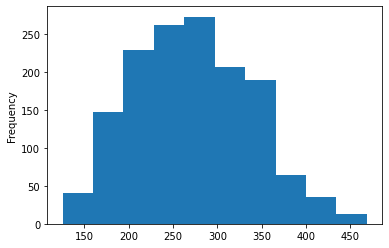

In [25]:
y.plot.hist()

<AxesSubplot:xlabel='sale_date'>

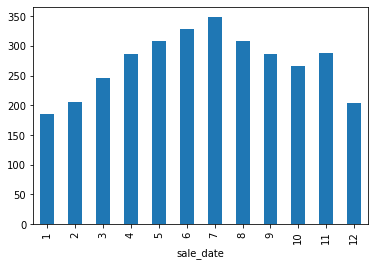

In [26]:
y.groupby(y.index.month).mean().plot.bar()

<AxesSubplot:xlabel='month', ylabel='sales_total'>

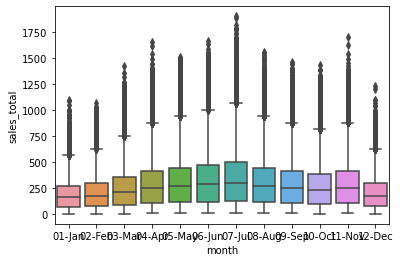

In [27]:
sns.boxplot(x='month', y='sales_total', data=train)

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

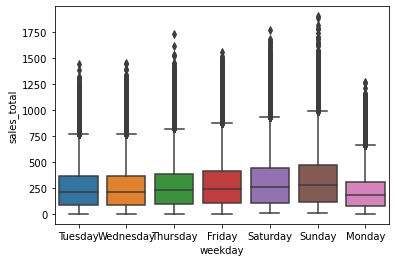

In [28]:
sns.boxplot(x='weekday', y='sales_total', data=train)

<AxesSubplot:title={'center':'7 day average'}, xlabel='sale_date'>

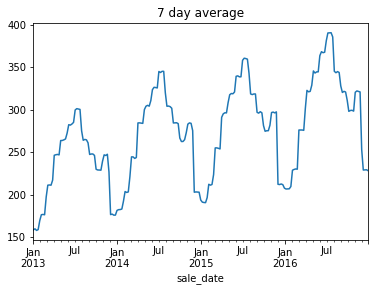

In [29]:
y.resample('7d').mean().plot(title='7 day average')

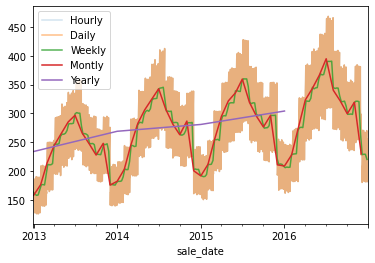

In [30]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

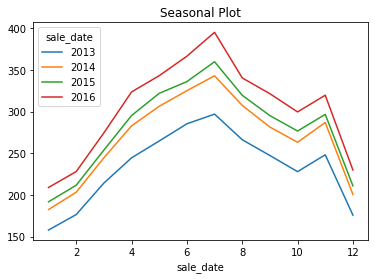

In [32]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


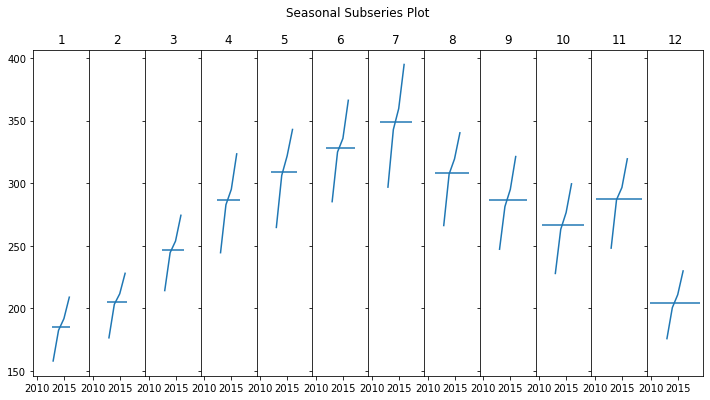

In [33]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)
# change figure size
fig.set_size_inches(12, 6)

Text(0.5, 1.0, 'Lag plot with lag=1')

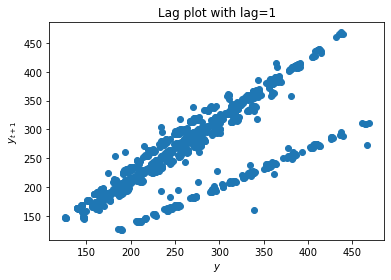

In [34]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [35]:
train = train.resample('D').mean()
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 4, labels=['dismal', 'poor', 'high', 'very high'])
train.groupby('sales_bin').sales_total.mean()

sales_bin
dismal       189.479608
poor         246.929838
high         293.702219
very high    358.484977
Name: sales_total, dtype: float64

Text(0, 0.5, '% of days in the month')

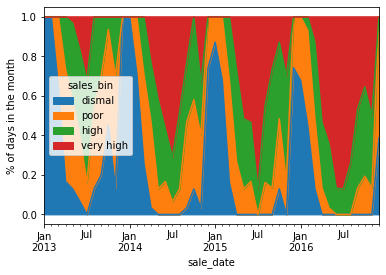

In [36]:
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

## OPS Data

In [37]:
df = acquire.acquire_energy()

In [38]:
df = prepare.prep_opsd(df)

In [39]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006


In [40]:
# Split for train/test
train = df[:'2013']
test = df['2013':]

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2006-01-01 to 2013-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  2922 non-null   float64
 1   Wind         2922 non-null   float64
 2   Solar        2922 non-null   float64
 3   Wind+Solar   2922 non-null   float64
 4   month        2922 non-null   object 
 5   year         2922 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 159.8+ KB


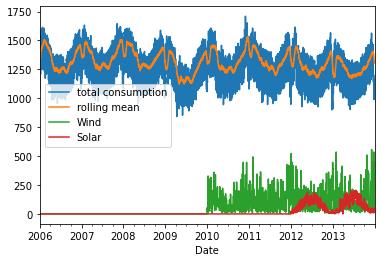

In [43]:
train.Consumption.plot(label = 'total consumption')
plt.plot(train.Consumption.rolling('30D').mean(), label='rolling mean')
train.Wind.plot()
train.Solar.plot()
plt.legend()

<AxesSubplot:xlabel='month', ylabel='Consumption'>

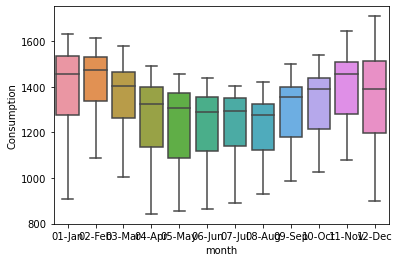

In [44]:
sns.boxplot(x='month', y='Consumption', data=train)

In [45]:
target = 'Consumption'

<AxesSubplot:xlabel='Consumption', ylabel='Count'>

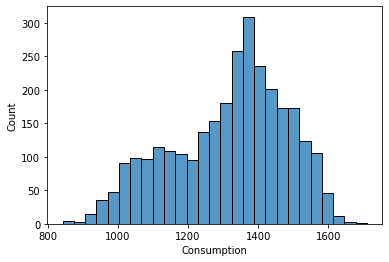

In [46]:
sns.histplot(train[target])

In [49]:
train['weekday'] = train.index.weekday.astype(str) + '-' + train.index.strftime('%a')

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_62807/2457199129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = train.index.weekday.astype(str) + '-' + train.index.strftime('%a')


In [50]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,weekday
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006,6-Sun
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006,0-Mon
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006,1-Tue
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006,2-Wed
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006,3-Thu


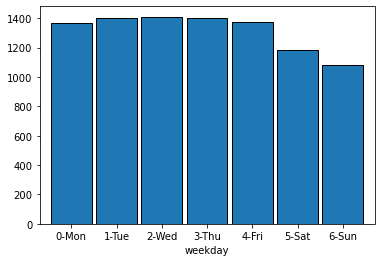

In [53]:
train.groupby('weekday')[target].mean().plot.bar(rot=0, width=.9, ec='black')
plt.show()

<AxesSubplot:xlabel='month'>

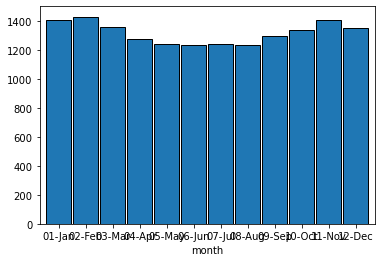

In [54]:
train.groupby('month')[target].mean().plot.bar(rot=0, width=.9, ec='black')

In [55]:
periods = ['D', 'W', 'M', 'Q', 'Y']
labels = ['Daily', 'Weekly', 'Monthly', 'Quarterly', 'Yearly']

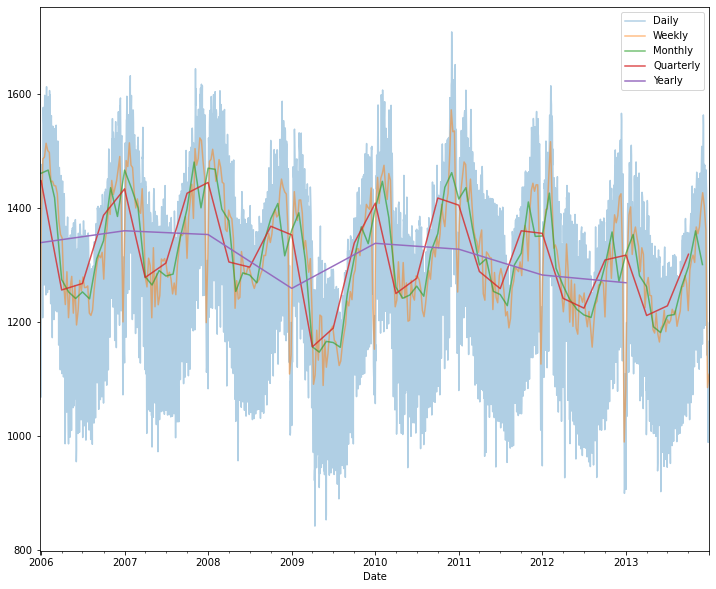

In [56]:
alpha = .2
for per, per_label in zip(periods, labels):
    alpha += .15
    train[target].resample(per).mean().plot(alpha=alpha, figsize=(12,10), label=per_label)
plt.legend()
plt.show()

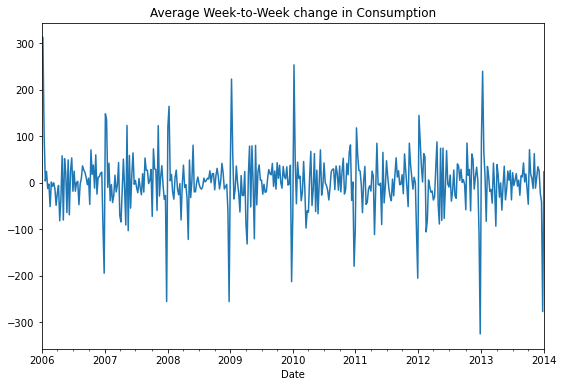

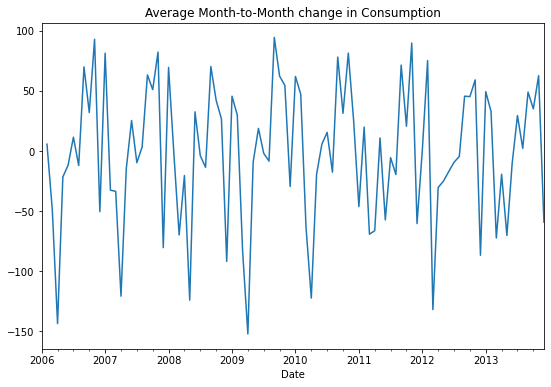

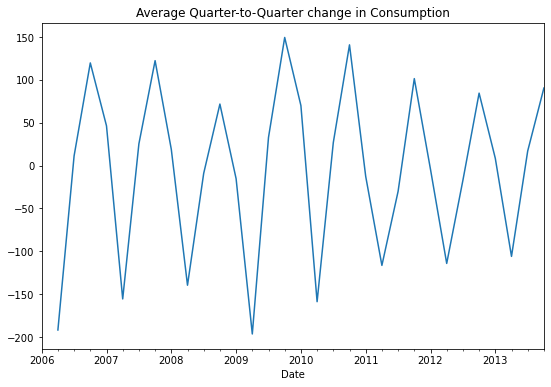

In [57]:
per = ['W', 'M', 'Q'] # list of periods by which to resample
per_name = ['Week', 'Month', 'Quarter'] # readable names of those periods

for i in range(len(per)):
    train[target].resample(per[i]).mean().diff().plot(title=f'Average {per_name[i]}-to-{per_name[i]} change in {target}',
                                                      figsize=(9,6))
    plt.show()

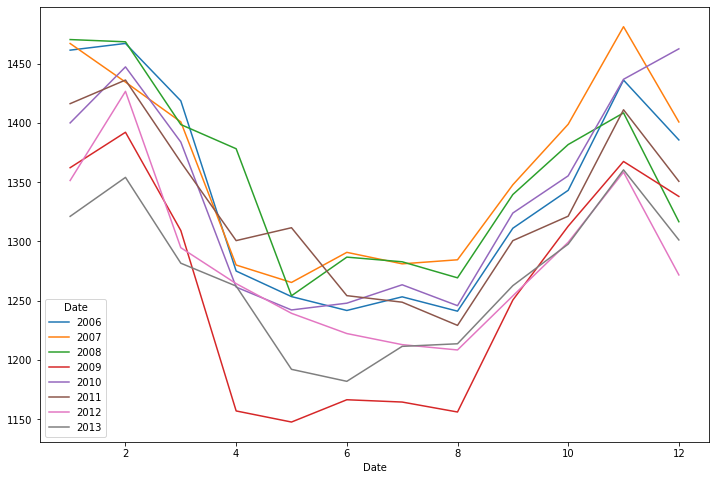

In [58]:
train[target].groupby([train[target].index.year, train[target].index.month]).mean().unstack(0).plot(figsize=(12,8))
None

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_62807/2797718568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['bins'] = pd.qcut(train[target], 3, labels=('low', 'medium', 'high'))


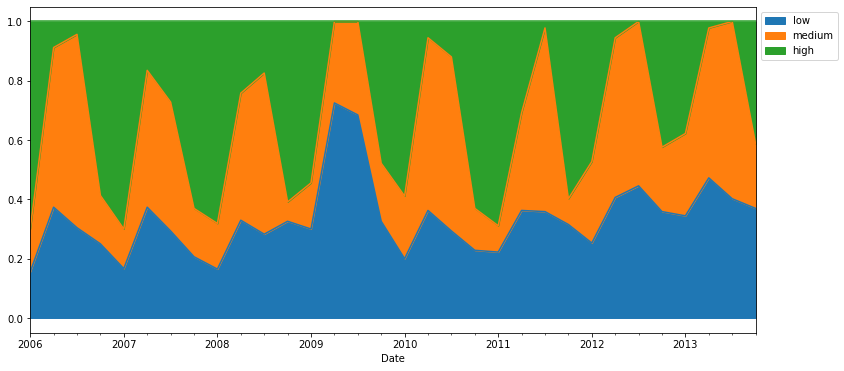

In [59]:
train['bins'] = pd.qcut(train[target], 3, labels=('low', 'medium', 'high'))
ax = (train.groupby('bins')[target]
     .resample('Q')
     .size()
     .unstack(0)
     .apply(lambda row: row/row.sum(), axis=1)
     .plot.area(figsize=(13,6)))
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
None

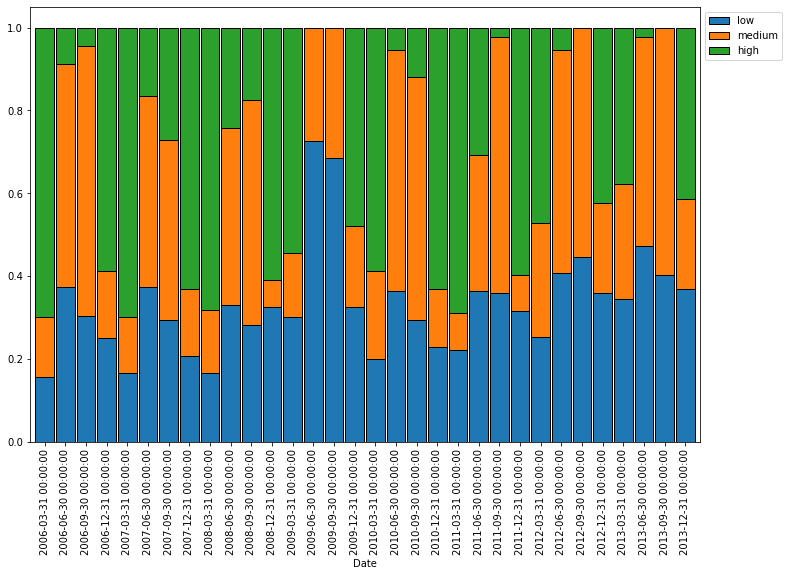

In [61]:
ax = (train.groupby('bins')[target]
           .resample('Q')
           .size()
           .unstack(0)
           .apply(lambda row: row / row.sum(), axis=1)
           .plot.bar(stacked=True, width=.9, ec='black', figsize=(12,8)))
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
None

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

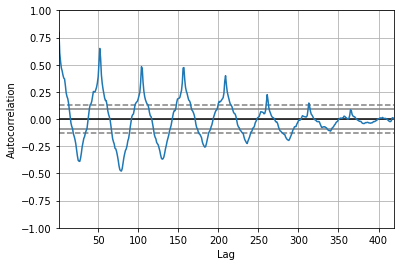

In [63]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())


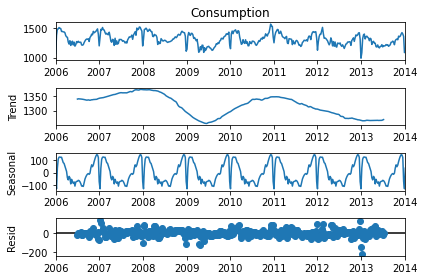

In [64]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').Consumption.mean(), model='additive')
decomposition.plot()
None